# Lab3_N11 Пшенин В.И. 6133

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [3]:
noise = np.random.randn(884, 2)

In [4]:
# Параметры генерации данных

In [5]:
cloud1 = noise + np.array([0, 0])
cloud2 = noise + np.array([0, 1])
cloud3 = noise + np.array([1, 0])
cloud4 = noise + np.array([0.5, 0.5])
cloud5 = noise + np.array([1, 1])
cloud6 = noise + np.array([0.7, 1])
cloud7 = noise + np.array([0.9, 2])

In [6]:
XY = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5, cloud6, cloud7])
XY.shape

(6188, 2)

In [7]:
annotation1 = [1]*884
annotation2 = [2]*884
annotation3 = [3]*884
annotation4 = [4]*884
annotation5 = [5]*884
annotation6 = [6]*884
annotation7 = [7]*884
annotations = annotation1 + annotation2 + annotation3 + annotation4 + annotation5 + annotation6 + annotation7

In [8]:
# Графическое представления расположения набора данных

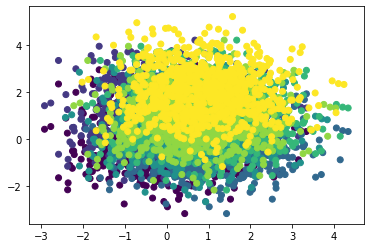

In [9]:
plt.scatter(XY[:,0], XY[:,1], c=annotations)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [11]:
data, labels = shuffle(XY, annotations)
test_size = int(len(data) * 0.5)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

In [12]:
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain);

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
predictions = clf.predict(Xtest)

In [14]:
# Матрица ошибок

In [15]:
confusion_matrix(Ytest, predictions)

array([[215,  88,  93,   6,  12,  10,  17],
       [ 89, 159,  46,  12,   9,  28,  79],
       [ 93,  31, 222,  11,  26,  18,  31],
       [109, 106, 123,  11,  27,  24,  47],
       [ 43,  59, 117,   7,  63,  21, 155],
       [ 58,  88,  95,   9,  44,  26, 119],
       [ 10,  63,  24,   5,  43,  22, 281]])

In [16]:
# Значение точности классификации R1=0.31 R2=0.33

In [17]:
accuracy_score(Ytest, predictions) * 100

31.577246283128634

In [18]:
report = classification_report(Ytest, predictions)

In [19]:
print(report)

              precision    recall  f1-score   support

           1       0.35      0.49      0.41       441
           2       0.27      0.38      0.31       422
           3       0.31      0.51      0.39       432
           4       0.18      0.02      0.04       447
           5       0.28      0.14      0.18       465
           6       0.17      0.06      0.09       439
           7       0.39      0.63      0.48       448

    accuracy                           0.32      3094
   macro avg       0.28      0.32      0.27      3094
weighted avg       0.28      0.32      0.27      3094



In [63]:
model = DecisionTreeClassifier()

max_depth = [3, 4, 5, 6, 7]
max_leaf_nodes = [2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
criterion = ['gini', 'entropy']
parameters = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'criterion': criterion
}

g_search = GridSearchCV(
    estimator=model,
    param_grid=parameters
)


_ = g_search.fit(Xtrain, Ytrain)
print('Results:', g_search.best_params_ )
print('Best score:',g_search.best_score_)

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Results: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 22}
Best score: 0.31351001939237233


In [68]:
parameters_for_rand = {
    'max_depth': sp_randint(2, 100),
    'max_leaf_nodes': sp_randint(2, 100),
    'criterion': criterion
}

In [69]:
n_iter_search = 100
random_search = RandomizedSearchCV(model, param_distributions=parameters_for_rand,n_iter=n_iter_search)

In [70]:
__ = random_search.fit(Xtrain, Ytrain)
print('Results:', random_search.best_params_)
print('Best score:',random_search.best_score_)

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Results: {'criterion': 'entropy', 'max_depth': 80, 'max_leaf_nodes': 20}
Best score: 0.3112475759534583


In [71]:
# Заметим, что даже при большом диапазоне значений и числе итераций, точность выше при и использвании grid search

In [72]:
model_knn = KNeighborsClassifier()

In [75]:
parameters = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'weights': ['distance','uniform'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}
g_search = GridSearchCV(
    estimator=model_knn,
    param_grid=parameters
)


_ = g_search.fit(Xtrain, Ytrain)
print('Results:', g_search.best_params_ )
print('Best score:',g_search.best_score_)

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Results: {'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'uniform'}
Best score: 0.2954104718810601


In [93]:
parameters_for_rand = {
    'n_neighbors': sp_randint(2, 100),
    'weights': ['distance','uniform'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [94]:
n_iter_search = 100
random_search = RandomizedSearchCV(model_knn, param_distributions=parameters_for_rand,n_iter=n_iter_search)
__ = random_search.fit(Xtrain, Ytrain)
print('Results:', random_search.best_params_)
print('Best score:',random_search.best_score_)

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Results: {'algorithm': 'ball_tree', 'n_neighbors': 56, 'weights': 'uniform'}
Best score: 0.3177117000646412


In [106]:
# # В случае классификатора к-ближ. соседей при большом числе итераций и ближ. соседей, точность выше при использовании Random search

In [97]:
modelKNN = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 56, weights = 'uniform')
modelTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_leaf_nodes = 22)

In [98]:
metrics = ['precision_macro', 'recall_macro', 'f1_macro']

In [101]:
cv = cross_validate(modelKNN, Xtrain, Ytrain, scoring=metrics, return_train_score=True)

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [102]:
cv

{'fit_time': array([0.00225854, 0.00207329, 0.00166273]),
 'score_time': array([0.16824484, 0.16531301, 0.15252805]),
 'test_precision_macro': array([0.29209011, 0.29850887, 0.29738757]),
 'train_precision_macro': array([0.32847998, 0.31260428, 0.31818223]),
 'test_recall_macro': array([0.31724463, 0.31578338, 0.31613738]),
 'train_recall_macro': array([0.34382657, 0.33348329, 0.33357512]),
 'test_f1_macro': array([0.29681789, 0.2977574 , 0.29796585]),
 'train_f1_macro': array([0.32580828, 0.31219361, 0.31867017])}

In [103]:
cv = cross_validate(modelTree, Xtrain, Ytrain, scoring=metrics, return_train_score=True)
cv

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', avera

{'fit_time': array([0.00370836, 0.00368261, 0.00366807]),
 'score_time': array([0.00674033, 0.00710845, 0.00646925]),
 'test_precision_macro': array([0.28802773, 0.25686685, 0.31411443]),
 'train_precision_macro': array([0.33429982, 0.28139482, 0.3298293 ]),
 'test_recall_macro': array([0.30507071, 0.31044964, 0.32219345]),
 'train_recall_macro': array([0.33199967, 0.33958859, 0.33102123]),
 'test_f1_macro': array([0.28478989, 0.27024245, 0.29165722]),
 'train_f1_macro': array([0.31596423, 0.29523883, 0.30158965])}

In [114]:
# Cудя по параметру recall, можно сделать вывод, что при данных параметрах удалось минимизировать ошибку 2 рода

In [109]:
# Calculate F1-Score, precision and recall for each class (KNeighborsClassifier)
modelKNN.fit(Xtrain, Ytrain)
predictions = modelKNN.predict(Xtest)
report = classification_report(Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.31      0.46      0.37       441
           2       0.30      0.34      0.32       422
           3       0.31      0.40      0.35       432
           4       0.23      0.09      0.13       447
           5       0.26      0.22      0.24       465
           6       0.19      0.11      0.14       439
           7       0.41      0.53      0.46       448

    accuracy                           0.31      3094
   macro avg       0.29      0.31      0.29      3094
weighted avg       0.29      0.31      0.29      3094



In [113]:
# Calculate F1-Score, precision and recall for each class (DecisionTreeClassifier)
modelTree.fit(Xtrain, Ytrain)
predictions = modelTree.predict(Xtest)
report = classification_report(Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.26      0.56      0.35       441
           2       0.32      0.28      0.30       422
           3       0.40      0.36      0.38       432
           4       0.16      0.05      0.08       447
           5       0.27      0.10      0.14       465
           6       0.21      0.16      0.18       439
           7       0.39      0.64      0.49       448

    accuracy                           0.31      3094
   macro avg       0.29      0.31      0.27      3094
weighted avg       0.29      0.31      0.27      3094



# Вывод: найдены оптимальные параметры для тренировки классификаторов: KNeighborsClassifier и DecisionTreeClassifier. Использование случайного поиска парметров дает хороший результат при большом кол-ве итераций и диапазоне параметров (но не для всех классификаторов). Удалось минимизировать ошибку 2 рода. 